In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))

from UKMovementSensing import hsmm

import pandas as pd
import numpy as np

In [7]:
execfile('config.py')

## Load the data

In [18]:
filenames = os.listdir(train_path)
filenames = [fn for fn in filenames if os.path.isfile(os.path.join(train_path,fn))]
datasets = [pd.read_csv(os.path.join(train_path,fn)) for fn in filenames]
print(len(datasets))

1030


In [9]:
for i in range(len(datasets)):
    datasets[i] = datasets[i].set_index('timestamp')
    datasets[i].index = pd.to_datetime(datasets[i].index) 

In [10]:
# Take one example datset and have a look
example_index = 0
example_data = datasets[example_index]

example_data.head()

,acceleration,EN,anglex,angley,anglez,roll_med_acc_x,roll_med_acc_y,roll_med_acc_z,dev_roll_med_acc_x,dev_roll_med_acc_y,dev_roll_med_acc_z,invalid,heuristic,filename,subset,switched_pos
timestamp,,,,,,,,,,,,,,,,
2015-02-24 04:00:00,0.028037,1.007847,11.035729,69.339853,15.032060,0.181129,0.900449,0.250036,0.162393,-0.111507,-0.172999,0,2,__022934_2015-03-06 10-31-40.bin_day1.csv,0,False
2015-02-24 04:00:05,0.036746,1.008591,26.928205,51.454448,12.776354,0.359184,0.680190,0.209050,-0.064047,0.006529,-0.090749,0,2,__022934_2015-03-06 10-31-40.bin_day1.csv,0,False
2015-02-24 04:00:10,0.006816,1.004899,69.277634,19.457112,6.853087,0.939587,0.334627,0.119869,0.000099,0.000020,0.000417,0,2,__022934_2015-03-06 10-31-40.bin_day1.csv,0,False
2015-02-24 04:00:15,0.005725,1.004631,68.907200,19.713034,7.204811,0.937400,0.338900,0.126005,-0.000690,0.000759,0.001608,0,2,__022934_2015-03-06 10-31-40.bin_day1.csv,0,False
2015-02-24 04:00:20,0.005359,1.004275,68.942364,19.752861,7.006807,0.935804,0.338900,0.122325,0.001005,0.001597,-0.000331,0,2,__022934_2015-03-06 10-31-40.bin_day1.csv,0,False


## Prepare data for HSMM

In [11]:
X_list = [d[column_names].as_matrix() for d in datasets]

## Train HSMM

/home/dafne/anaconda2/envs/ucl2/lib/python2.7/site-packages/pybasicbayes/util/stats.py:185: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  x = np.random.randn(nu,n)


0
Resampled 1 sequences in 3.8 seconds
Log likelihood:  27567.8906021


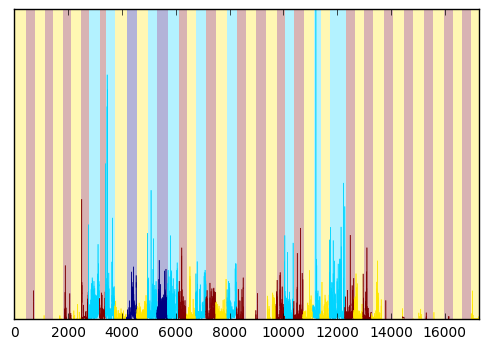

Convergence: average Hamming distance is 0.803414351852
1
Resampled 1 sequences in 3.5 seconds
Log likelihood:  34376.5562676


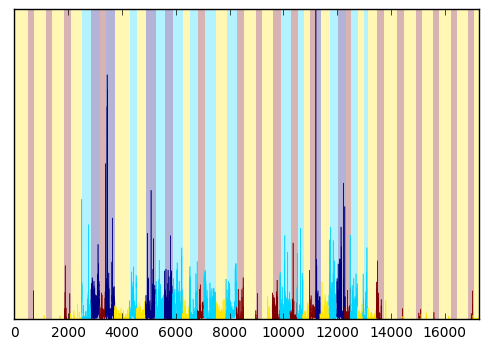

Convergence: average Hamming distance is 0.455729166667
2
Resampled 1 sequences in 3.4 seconds
Log likelihood:  37158.4464069


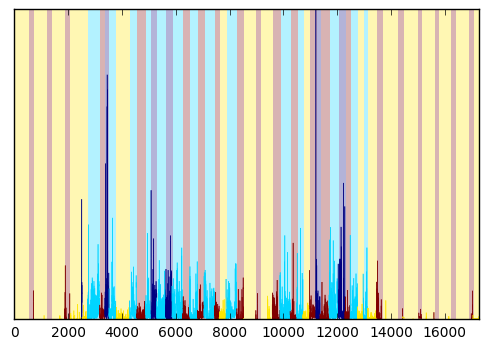

Convergence: average Hamming distance is 0.1671875
3
Resampled 1 sequences in 3.5 seconds
Log likelihood:  38608.8804123


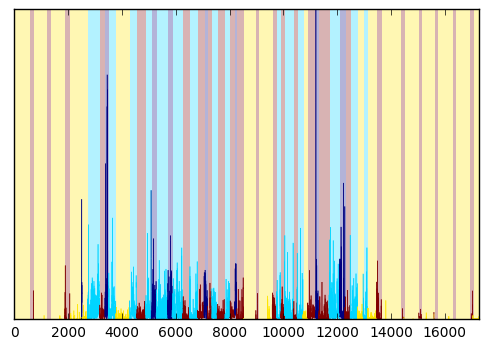

Convergence: average Hamming distance is 0.121469907407
4
Resampled 1 sequences in 3.4 seconds
Log likelihood:  39469.9314572


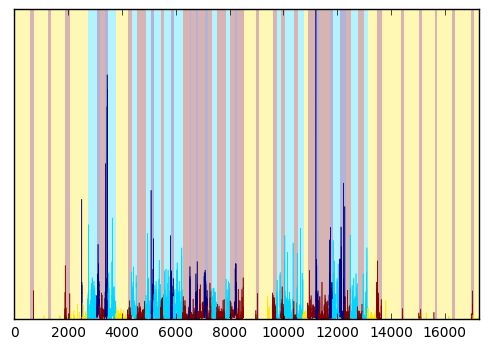

Convergence: average Hamming distance is 0.0954861111111
5
Resampled 1 sequences in 3.5 seconds
Log likelihood:  40002.6729883


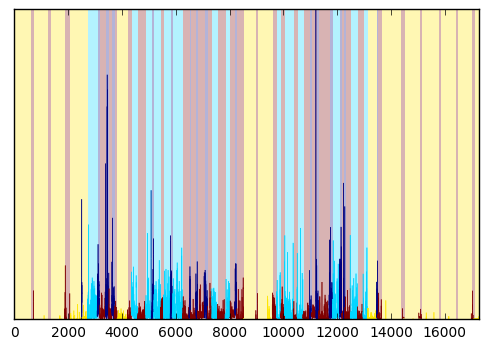

Convergence: average Hamming distance is 0.0858217592593
6
Resampled 1 sequences in 3.4 seconds
Log likelihood:  40551.5682937


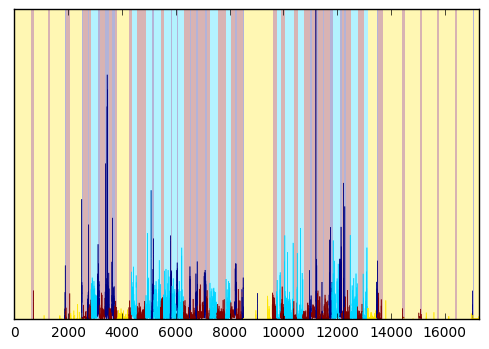

Convergence: average Hamming distance is 0.077662037037
7
Resampled 1 sequences in 3.2 seconds
Log likelihood:  41153.2126526


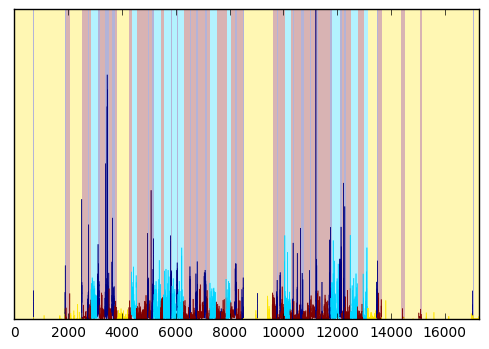

Convergence: average Hamming distance is 0.0838541666667
8
Resampled 1 sequences in 3.4 seconds
Log likelihood:  41641.9841446


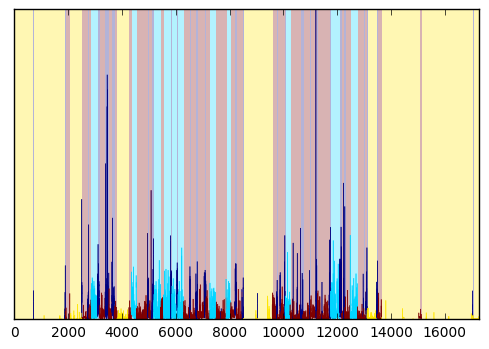

Convergence: average Hamming distance is 0.0324652777778


In [12]:
#Note that with many iterations, the visualization becomes badly visible
model, model_dist = hsmm.train_hsmm(X_list, Nmax=Nmax, nr_resamples=nr_resamples, trunc=truncate, visualize=True, example_index=example_index)

## Plot one example

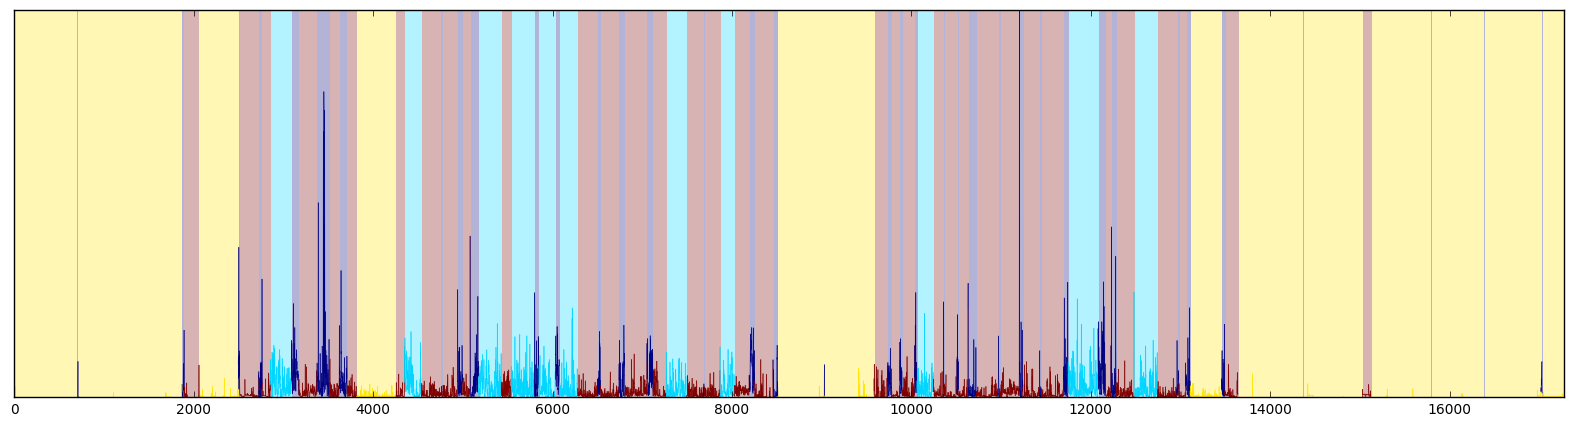

In [13]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20, 5))
model.plot_stateseq(example_index)

## Save the data with the states

Save the data including the states found. This labeled data serves as an input to the analyses.

In [14]:
for i, dat in enumerate(datasets):
    dat['state'] = model.stateseqs[i]
    fn = str(str(dat['subset'][0]) + dat['filename'][0])+'.csv'
    dat.to_csv(os.path.join(states_path, fn))

## Save the model

NB: This removes the data from the model! Only run this if you've saved the data with states.

In [15]:
import pickle
#Remove the data from the model
model.states_list = []

with open(model_file, 'wb') as f:
    pickle.dump(model, file=f)

## Save the config

In [17]:
from shutil import copyfile

copyfile('config.py', config_file)

## Possibly: Apply the model to new data